In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

%matplotlib inline

In [6]:
img = cv2.imread('/Users/skylark/Desktop/gh.jpg')
height, width, _ = img.shape

net = cv2.dnn.readNet("/Users/skylark/Desktop/Misc/YOLO/yolov3.weights", "/Users/skylark/Desktop/Misc/YOLO/yolov3.cfg")

names = []
with open('/Users/skylark/Desktop/Misc/YOLO/coconames.txt') as f:
    names = [content.strip() for content in f.readlines()]
    
colors = np.random.uniform(255, size = (len(names), 3))    
    
layers = net.getLayerNames()
output_layers = [layers[i[0]-1] for i in net.getUnconnectedOutLayers()]

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop = False)
net.setInput(blob)
outs = net.forward(output_layers)

boxes = [] 
confidences = []
class_ids = []

font = cv2.FONT_HERSHEY_PLAIN

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence>0.5:
            centre_x = int(detection[0]*width)
            centre_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(centre_x-w/2)
            y = int(centre_y-h/2)
            #cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
indeces = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)            
for i in range(len(boxes)):
    if i in indeces:        
        x, y, w, h = boxes[i]
        label = str(names[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
        cv2.putText(img, label, (x-10,y+30), font, 3, color, 3)        

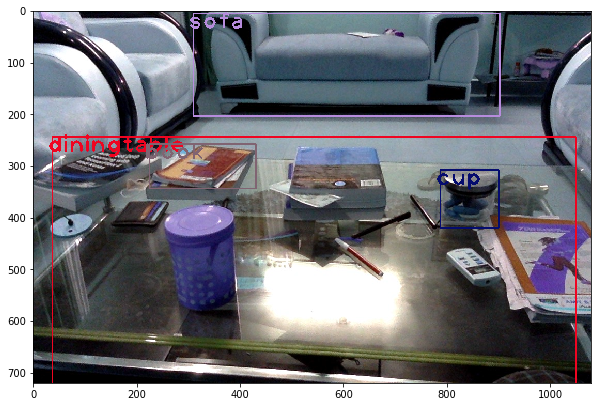

In [7]:
plt.figure(figsize=(10,10))    
plt.imshow(img)
plt.show()    

In [8]:
cv2.imwrite('/Users/skylark/Desktop/gh_obj.jpg', img)

True